__Atelier KNN__
- Nous voulons étudier le problème de churn. Les données se présentent dans un fichier CSV contenant 13 variables explicatives et une variable cible (Exited). L'objectif est d'aider l'entreprise à trouver un modèle décisif (kNN) qui prédit si le client va churner ou pas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

__I- Lecture et chargement des données__

In [2]:
data = pd.read_csv('final_df.csv')

In [3]:
data.shape
data.head(7)

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,grid,podium,...,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
0,1983,1,False,False,True,False,False,keke_rosberg,1,15,...,0,0,0,0,0,0,0,0,0,1
1,1983,1,False,False,True,False,False,prost,2,6,...,0,0,0,1,0,0,0,0,0,0
2,1983,1,False,False,True,False,False,tambay,3,4,...,0,0,0,0,0,0,0,0,0,0
3,1983,1,False,False,True,False,False,piquet,4,1,...,0,0,0,0,0,0,0,0,0,0
4,1983,1,False,False,True,False,False,warwick,5,7,...,0,0,0,0,0,0,0,0,0,0
5,1983,1,False,False,True,False,False,arnoux,6,9,...,0,0,0,0,0,0,0,0,0,0
6,1983,1,False,False,True,False,False,patrese,7,23,...,0,0,0,0,0,0,0,0,0,0


__II- Préparation des données__

Supprimer les lignes/colonnes avec des valeurs manquantes

In [4]:
dataD=data.dropna()

Encodage des variables explicatives ( Conversion Var Categorielle en Var Quantitative ) 









In [5]:
dataD.dtypes

season                    int64
round                     int64
weather_warm               bool
weather_cold               bool
weather_dry                bool
                          ...  
constructor_team_lotus    int64
constructor_toro_rosso    int64
constructor_toyota        int64
constructor_tyrrell       int64
constructor_williams      int64
Length: 100, dtype: object

In [6]:
data.shape

(14273, 100)

Nbr d'exemples/classe

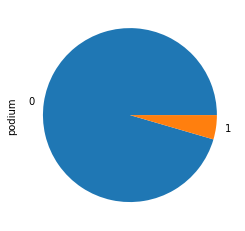

In [7]:
data.podium = data.podium.map(lambda x: 1 if x == 1 else 0)
data['podium'].value_counts().plot.pie()
plt.show()

__III- Modélisation des données



Diviser les données en données d'apprentissage et données de test.

In [8]:
#Séparer les variables explicatives X/Classe y
X = data.drop(['podium','driver'], axis=1)
y = data['podium']
#Diviser les données (80% Apprentissage et 20% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Centrage-Réduction des données (Standardisation)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Phase d'apprentissage: Appliquer le modèle KNN avec les données d'apprentissage


Text(0, 0.5, 'Erreur')

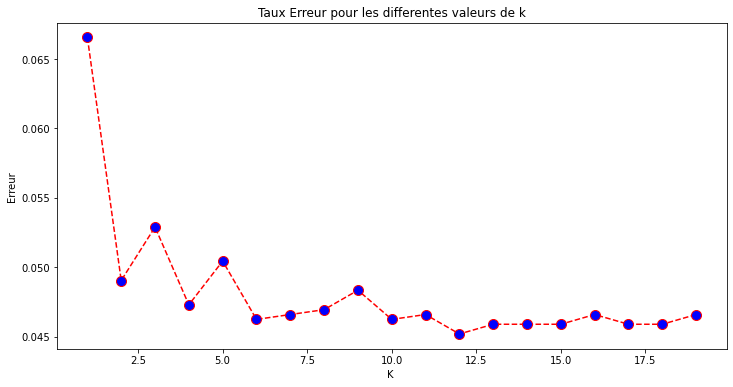

In [10]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 20):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

Paramétrage du modèle (Hyperparameter Tuning) --> chercher à travers gridsearch les meilleurs hyperparamètres 

In [11]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,20))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 19


In [12]:
# Afficher les paramètres qui donnent les meilleurs performances
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 1, 'n_neighbors': 19, 'p': 2}


Evaluation du modèle

In [13]:
#Taux de bonne classification
best_result = clf.best_score_
print(best_result)

0.9550709811499729


In [18]:
knn = KNeighborsClassifier(19,p=1,leaf_size=1 )
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [19]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.95


In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[2719    5]
 [ 128    3]]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2724
           1       0.38      0.02      0.04       131

    accuracy                           0.95      2855
   macro avg       0.67      0.51      0.51      2855
weighted avg       0.93      0.95      0.93      2855

